# Tutorial 4 - Pressure vs Temperature

Surfinpy has the functionality to generate phase diagrams as a function of pressure vs temperature based upon the methodology used in Molinari et al. (J. Phys. Chem. C  116, 12, 7073-7082) according to

\begin{align}
\gamma_{adsorbed, T, P} & = \gamma_{bare} + ( C ( E_{ads, T} - RTln(\frac{p}{p^o})
\end{align}

where $\gamma_{adsorbed, T, p}$ is the surface energy of the surface with adsorbed species at temperature (T) and pressure (P), $\gamma_{bare}$ is the suface energy of the bare surface, C is the coverage of adsorbed species, $E_{ads}$ is the adsorption energy, 

\begin{align}
E_{ads, T} & =  E_{slab, adsorbant} - (E_{slab, bare} + n_{H_2O} E_{H_2O, T}) / n_{H_2O}
\end{align}

where $E_{slab, adsorbant}$ is the energy of the surface and the adsorbed species, $n_{H_2O}$ is he number of adsorbed species, 

\begin{align}
E_{H_2O, (T)} & = E_{H_2O, (g)} - TS_{(T)}
\end{align}

where $S_{(T)}$ is the experimental entropy of gaseous water in the standard state.

So let's look at this in action. The module used is called p_vs_t

In [9]:
import matplotlib.pyplot as plt
from surfinpy import utils as ut
from surfinpy import p_vs_t
from surfinpy import data

There are a number of user inputs that are required, the inputs are similiar to mu_vs_mu but with some small differences. First we need the energy from DFT of the adsorbant (eV), the energy of the surface ($j_m^2$) and the data for each surface. For clarity, in the `surfinpy.data.DataSet` objects for each surface it is always assumed that the adsorbing species is 'Y'.

In [10]:
adsorbant = -14.00

In [11]:
SE = 1.40

In [12]:
stoich = data.DataSet(cation = 24, x = 48, y = 0, area = 60.22, energy = -575.00, label = 'Bare')
H2O =    data.DataSet(cation = 24, x = 48, y = 2, area = 60.22, energy = -605.00, label = '1 Water')
H2O_2 =  data.DataSet(cation = 24, x = 48, y = 8, area = 60.22, energy = -695.00, label = '2 Water')

In [13]:
data = [H2O, H2O_2]

The coverage of the adsorbing species (in this case water) is also needed. surfinpy has a built in function within the utils module to do this for you, it takes the number of adsorbing species and the surface area and calculates the coverage for you. 

In [14]:
cov = ut.calculate_coverage(data)

We need the thermochemical data for the adsorbed species in order to make the DFT energy of our adsorbing species a temperature dependent term. This data has been taken directly from the NIST Janaf database and has been cut to just include the temperature and S values within the temperature range that interests us (In this case 0 - 1000 K). 

In [15]:
thermochem = ut.read_nist("H2O.txt")

Now we can generate our phase diagram . 

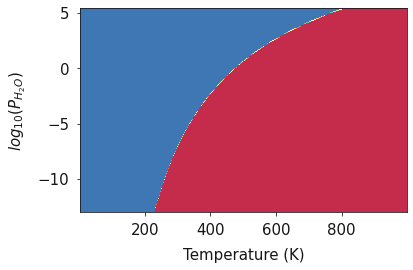

In [16]:
system = p_vs_t.calculate(stoich, data, SE, adsorbant, thermochem, coverage=cov)
ax = system.plot(colourmap='Spectral', figsize=(6, 4), ylabel='$log_{10} (P_{H_2O})$')
plt.savefig("../../../docs/source/Figures/Surfaces_7.png", dpi=600)
plt.show()